# Zomato Restaurant 

Project Description 

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best 

cuisines of every part of the world which lies in their budget. This analysis is also for those who 

want to find the value for money restaurants in various parts of the country for the cuisines. 

Additionally, this analysis caters the needs of people who are striving to get the best cuisine of 

the country and which locality of that country serves that cuisines with maximum number of 

restaurants. 

 

Data Storage: 

This problem statement contains two datasets- Zomato.csv and country_code.csv. 

Country_code.csv contains two variables: 

· Country code 

· Country name 

 

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each 

restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables: 

• Restaurant Id: Unique id of every restaurant across various cities of the world 

• Restaurant Name: Name of the restaurant 

• Country Code: Country in which restaurant is located 

• City: City in which restaurant is located 

• Address: Address of the restaurant 

• Locality: Location in the city 

• Locality Verbose: Detailed description of the locality 

• Longitude: Longitude coordinate of the restaurant&#39;s location 

• Latitude: Latitude coordinate of the restaurant&#39;s location 

• Cuisines: Cuisines offered by the restaurant 

• Average Cost for two: Cost for two people in different currencies �� 

• Currency: Currency of the country 

• Has Table booking: yes/no 

• Has Online delivery: yes/ no 

• Is delivering: yes/ no 

• Switch to order menu: yes/no 

• Price range: range of price of food 

• Aggregate Rating: Average rating out of 5 

• Rating color: depending upon the average rating color 

• Rating text: text on the basis of rating of rating 

• Votes: Number of ratings casted by people 

 

Problem statement : In this dataset predict 2 things – 

1) Average Cost for two 

2) Price range 

 

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

In [2]:
# loading the dataset
# data about restraurants
df = pd.read_csv('zomato.csv', encoding='latin1')
# country nam and country code data
df2 = pd.read_excel('Country-Code.xlsx')
# merging the both of the data 
data = pd.merge(df2,df,how='left')
data.sample(15)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1958,1,India,310491,4 on 44 Restaurant & Bar,New Delhi,"112, Aggarwal City Mall, Road 44, Near M2K Mul...","Aggarwal City Mall, Pitampura","Aggarwal City Mall, Pitampura, New Delhi",77.134623,28.690142,"North Indian, Chinese",1000,Indian Rupees(Rs.),Yes,Yes,No,No,3,2.6,Orange,Average,49
9326,216,United States,17375077,Shenanigan's Irish Pub,Gainesville,"87 N. Chestatee St., Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.986119,34.533198,"Bar Food, Seafood, Vegetarian",25,Dollar($),No,No,No,No,2,4.1,Green,Very Good,171
2055,1,India,179,McDonald's,New Delhi,"BG-02, Ansal Plaza Mall, Khel Gaon Marg, New D...","Ansal Plaza Mall, Khel Gaon Marg","Ansal Plaza Mall, Khel Gaon Marg, New Delhi",77.224359,28.562555,"Fast Food, Burger",500,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,48
1123,1,India,4122,Republic of Chicken,Gurgaon,"SG 28, Sector 14, Gurgaon",Sector 14,"Sector 14, Gurgaon",77.048441,28.473607,"Raw Meats, Fast Food",400,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,9
6769,1,India,305570,Aggarwal Sweet Corner,New Delhi,"Main Road, Beriwala Bagh, Subhash Nagar, New D...",Subhash Nagar,"Subhash Nagar, New Delhi",77.111166,28.634106,Mithai,100,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,2
4372,1,India,9315,Chidambaram's New Madras Hotel,New Delhi,"7, Khanna Market, Lodhi Colony, New Delhi",Lodhi Colony,"Lodhi Colony, New Delhi",77.220846,28.580771,"South Indian, Fast Food",400,Indian Rupees(Rs.),No,Yes,No,No,1,3.8,Yellow,Good,330
7908,1,India,307724,Wah Ji Wah,Noida,"Shop 1, D Block Market, Sector 27, Noida",Sector 27,"Sector 27, Noida",77.328098,28.574339,North Indian,500,Indian Rupees(Rs.),No,Yes,No,No,2,2.0,Red,Poor,74
4204,1,India,9906,Sethi's Food Corner,New Delhi,"37, Krishna Market, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241893,28.575236,"Chinese, North Indian",550,Indian Rupees(Rs.),No,No,No,No,2,3.3,Orange,Average,40
4101,1,India,303350,Clay 1 Grill,New Delhi,"A-10, 1st Floor, Najafgarh Road, Kirti Nagar, ...",Kirti Nagar,"Kirti Nagar, New Delhi",77.139495,28.655595,"North Indian, Mughlai",1000,Indian Rupees(Rs.),Yes,No,No,No,3,3.6,Yellow,Good,283
7214,1,India,6654,Black & Brew,New Delhi,"Shop 1, Single Story, Near Hanuman Mandir, Vij...",Vijay Nagar,"Vijay Nagar, New Delhi",77.202386,28.689523,Chinese,300,Indian Rupees(Rs.),No,No,No,No,1,3.1,Orange,Average,25


In [3]:
data.drop('Restaurant ID',axis=1,inplace=True)


In [4]:
# checking the shape of the data
data.shape

(9551, 21)

* dataset contains 9551 row 20 independent features and one target .

In [5]:
# checking the columns
data.columns

Index(['Country Code', 'Country', 'Restaurant Name', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant Name       9551 non-null   object 
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Observation
* The dataset contains some null values in the Cuisines column.
* There are a total of 14 categorical variables in the dataset.

In [7]:
data.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


📊 Observation
* Have a look on Avg, Min, Max values of Price, Rating, and Votes

In [8]:
# checking null values
data.isnull().sum()

Country Code            0
Country                 0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
# checking for duplicates
data.duplicated().sum()

0

In [10]:
## handling the null by dropping the null because null is to less in numbers
# Imputating Missing value with mode for categorical features
data['Cuisines'].fillna(data['Cuisines'].mode()[0],inplace=True)


In [11]:
## Top 10 countries which uses Zomato 
top_10 = data['Country'].value_counts()[:10].rename_axis('Country').reset_index(name='count')
top_10.style.background_gradient(cmap='Blues')

,Country,count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,South Africa,60
5,UAE,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


In [12]:
### countries with minimum transctions
data['Country'].value_counts()[-3:].rename_axis('Country').reset_index(name='count').style.background_gradient(cmap='Blues')

,Country,count
0,Singapore,20
1,Sri Lanka,20
2,Canada,4


In [13]:
## Most popular cuisines
popular_cuisines=df['Cuisines'].value_counts()[:10].rename_axis('Cuisines').reset_index(name='count')
popular_cuisines.style.background_gradient(cmap='Blues')

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


In [14]:
# Which Countries do have online deliveries option

data[data['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Online Deliveries are availabe only in india and UAE

<AxesSubplot:title={'center':'Most popular Cuisines'}, xlabel='count', ylabel='Cuisines'>

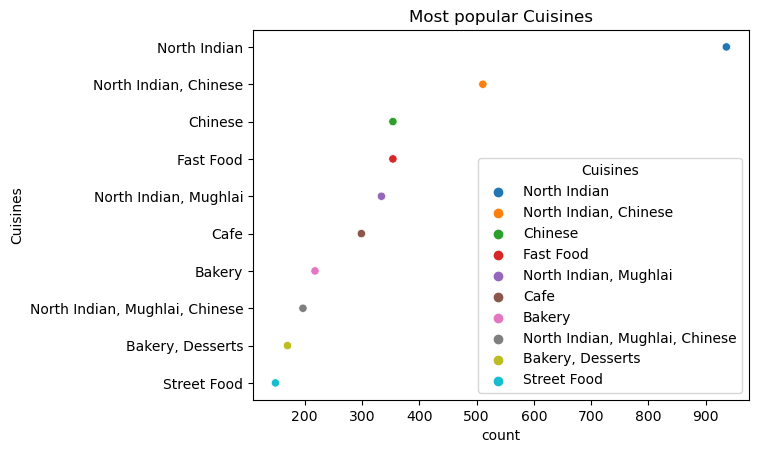

In [15]:
plt.title("Most popular Cuisines")   #add title

sns.scatterplot(y=popular_cuisines['Cuisines'],x=popular_cuisines['count'],hue=popular_cuisines['Cuisines'])

* most popular cuisines are north Indian and chinese.

In [16]:
data.head()

,Country Code,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [17]:
# creating a function to get values of the categorical columns
def unique_val(data):
    for column in data.columns:
        print(f"Column Name: {column}")
        if len(data[column].unique()) > 16:
            print(data[column].nunique())
            print("______________________________________________________________________________________________")
        else:
            print(data[column].unique())
            print("______________________________________________________________________________________________")


# Call the function to print unique values for each column
unique_val(data)

Column Name: Country Code
[  1  14  30  37  94 148 162 166 184 189 191 208 214 215 216]
______________________________________________________________________________________________
Column Name: Country
['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']
______________________________________________________________________________________________
Column Name: Restaurant Name
7446
______________________________________________________________________________________________
Column Name: City
141
______________________________________________________________________________________________
Column Name: Address
8918
______________________________________________________________________________________________
Column Name: Locality
1208
______________________________________________________________________________________________
Column Name: Locality Verbose
1265


In [18]:
# Get the indices of the top 60 cuisines
top_cuisine_indices = data.Cuisines.value_counts().index[:65]

# Use .loc to access the rows with the top cuisines
result = data[data.Cuisines.isin(top_cuisine_indices)]


## Dropping unnecessary columns

In [19]:
result.columns

Index(['Country Code', 'Country', 'Restaurant Name', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [20]:
result.drop(['Restaurant Name', 'Locality Verbose', 'Address','Locality'],axis=1,inplace=True)

In [21]:
# splitting into numeric and categorical columns
numerical_columns = [col for col in result.columns if result[col].dtype in ['int64', 'float64']]
categorical_columns = [col for col in result.columns if result[col].dtype == 'object']


In [22]:
final = result

## EDA

<AxesSubplot:ylabel='Density'>

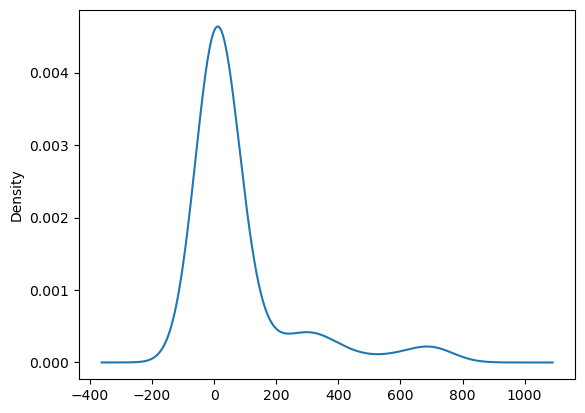

In [23]:
final['Average Cost for two'].value_counts().plot(kind='kde')

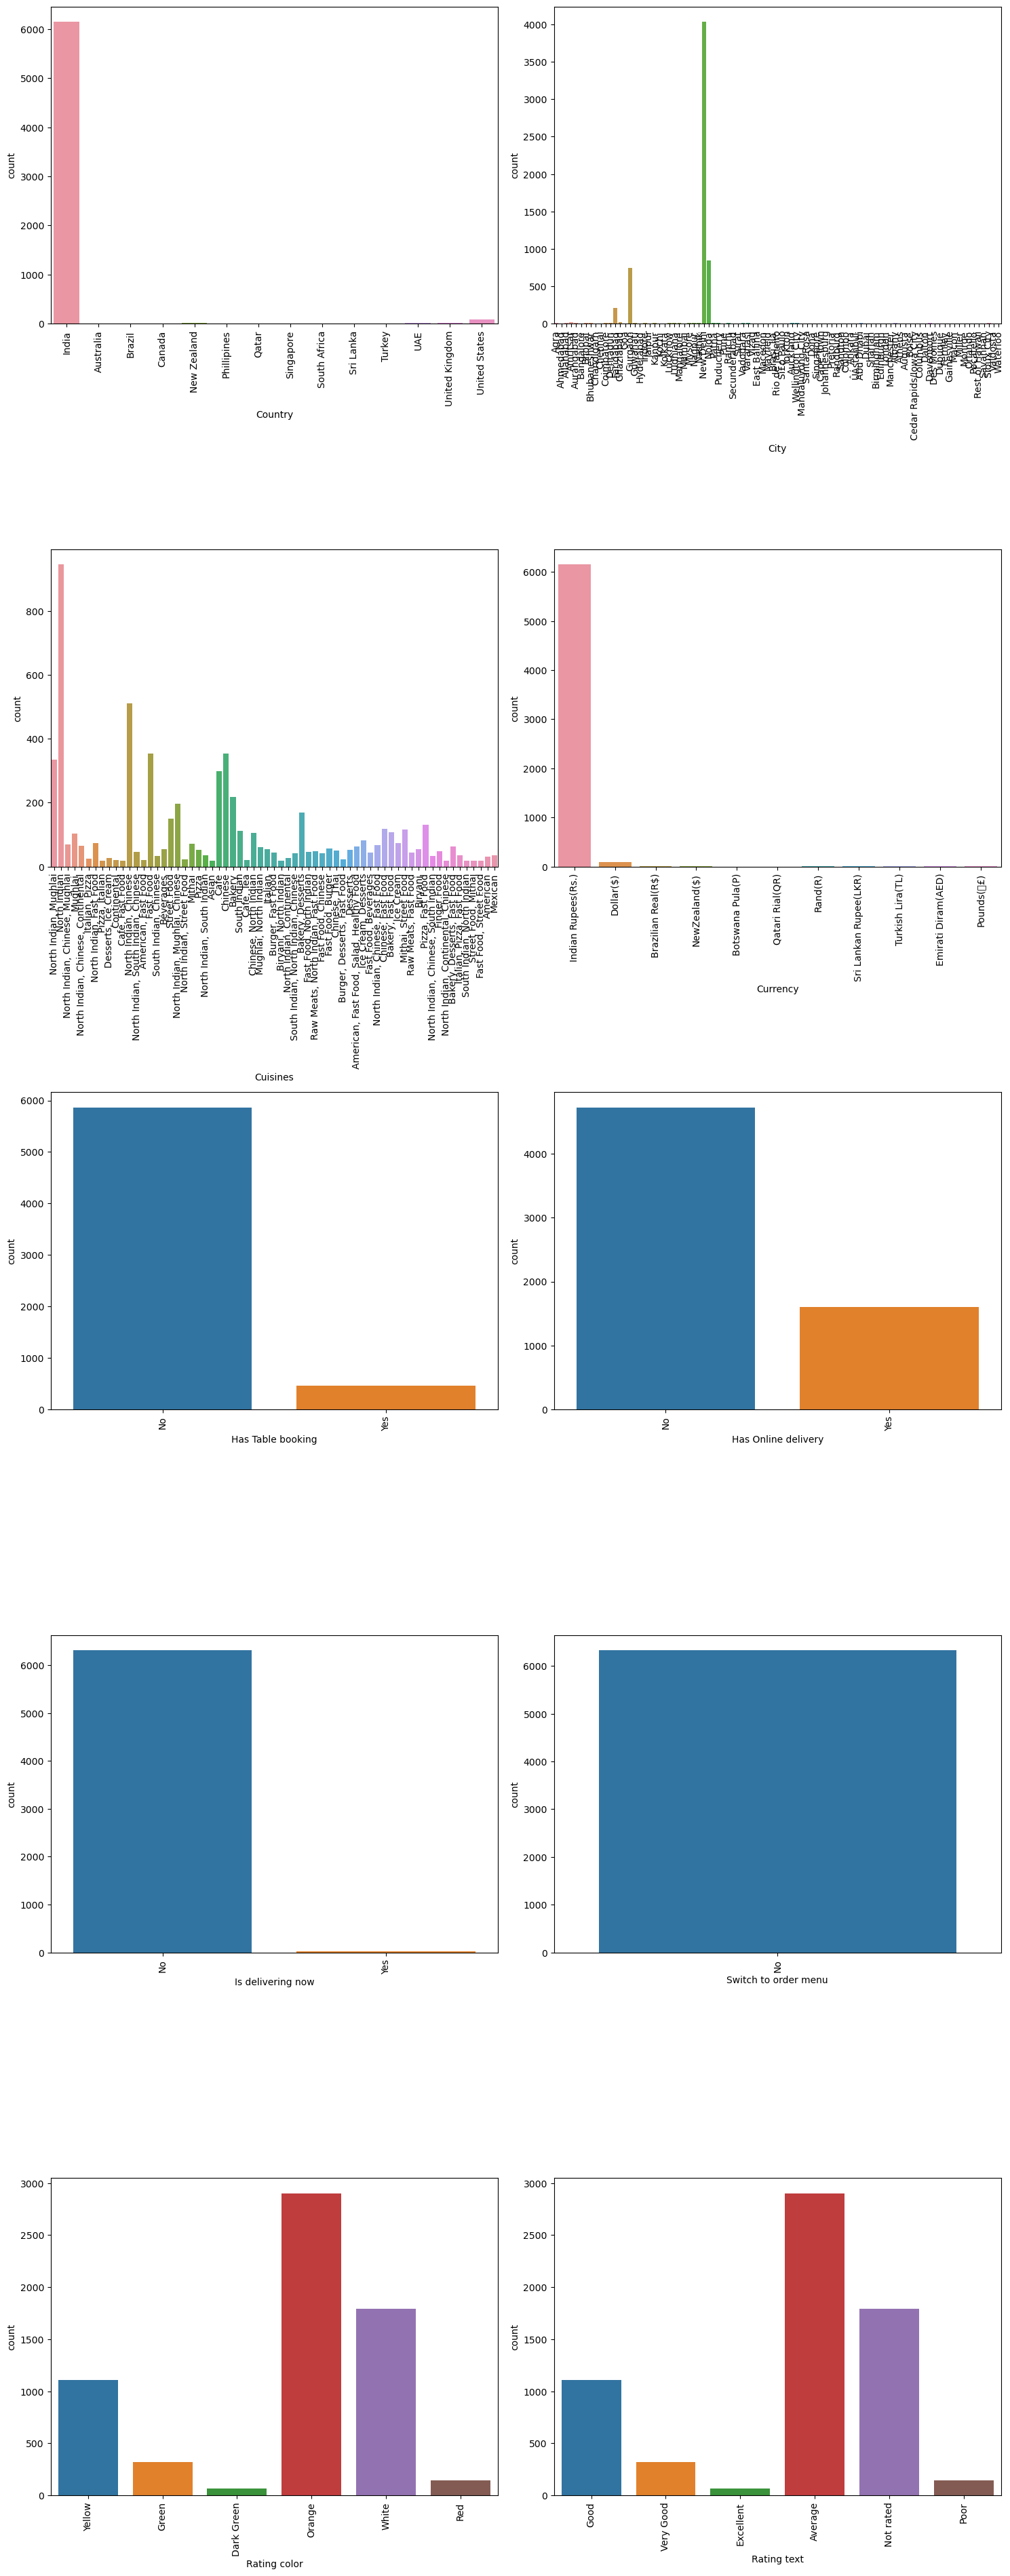

In [24]:
# Create the subplots
fig = plt.figure(figsize=(15, 45))

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_columns):
    plt.subplot(6, 2, i + 1)
    sns.countplot(data=final, x=col)  # Use the 'col' variable here
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

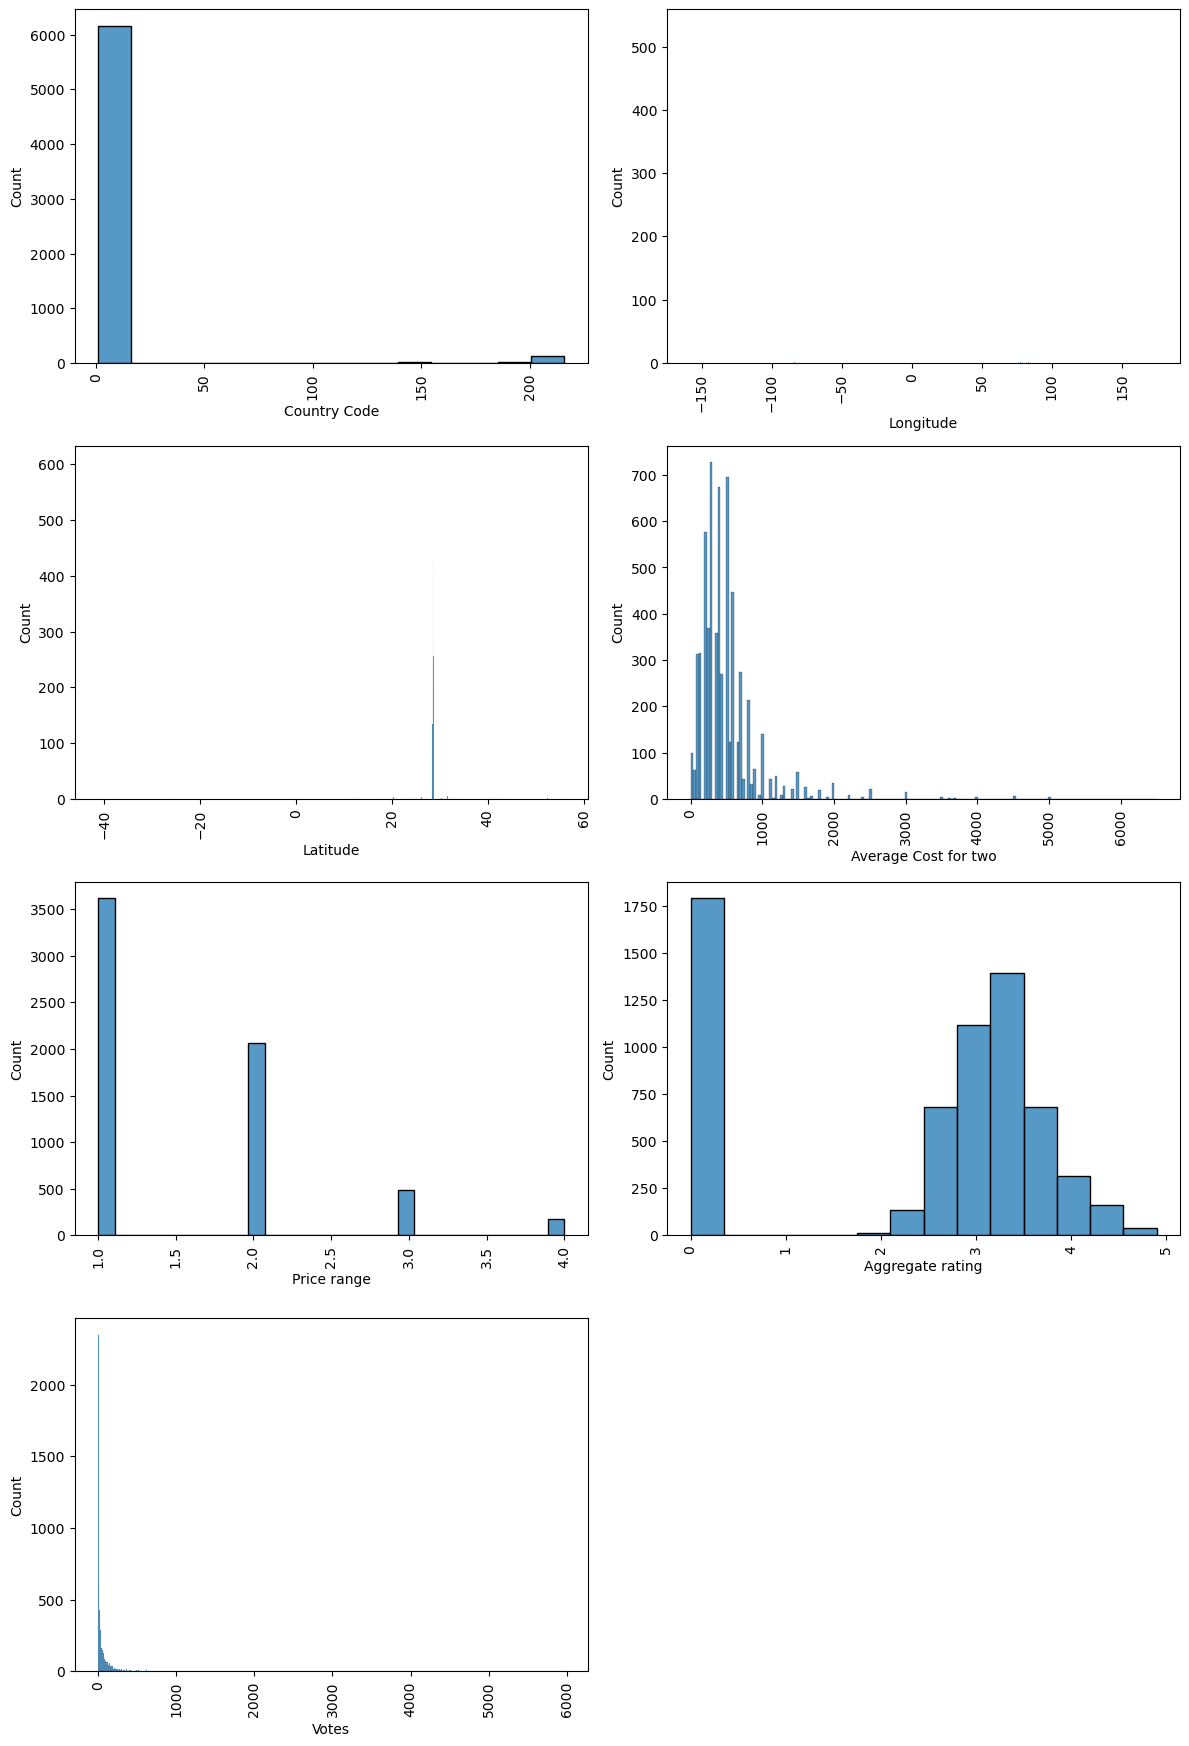

In [25]:
# Create the subplots
fig = plt.figure(figsize=(12, 30))


# Loop through categorical columns and plot count plots
for i, col in enumerate(numerical_columns):
    plt.subplot(7, 2, i + 1)
    sns.histplot(data=final, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()




## Bivariate analysis

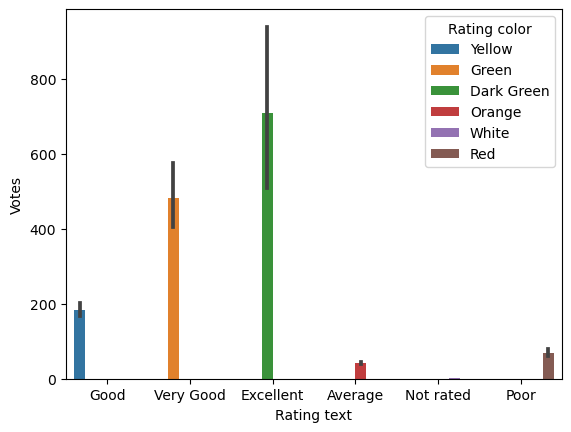

In [26]:
sns.barplot(x=final["Rating text"],y=final["Votes"],hue =final["Rating color"])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Indian Rupees(Rs.)'),
  Text(1, 0, 'Dollar($)'),
  Text(2, 0, 'Brazilian Real(R$)'),
  Text(3, 0, 'NewZealand($)'),
  Text(4, 0, 'Botswana Pula(P)'),
  Text(5, 0, 'Qatari Rial(QR)'),
  Text(6, 0, 'Rand(R)'),
  Text(7, 0, 'Sri Lankan Rupee(LKR)'),
  Text(8, 0, 'Turkish Lira(TL)'),
  Text(9, 0, 'Emirati Diram(AED)'),
  Text(10, 0, 'Pounds(\x8c£)')])

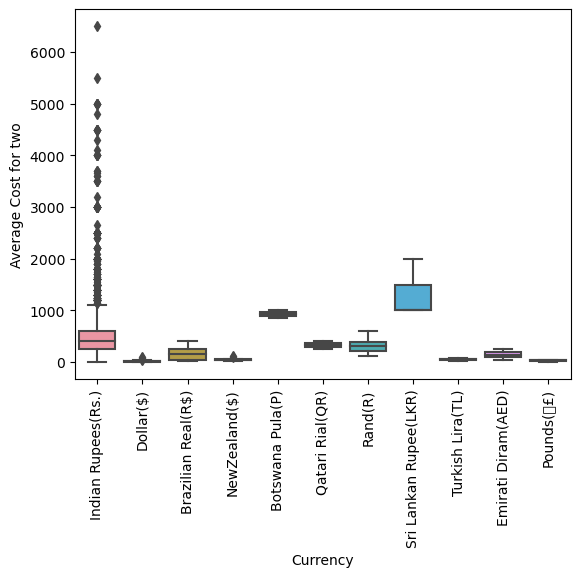

In [27]:
sns.boxplot(x =final["Currency"],y =final["Average Cost for two"])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

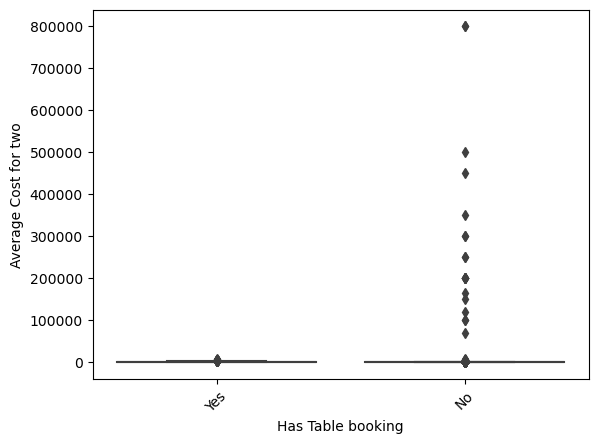

In [28]:
# has table booking vs average cost for two
sns.boxplot(x =df["Has Table booking"],y =df["Average Cost for two"])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Rating color'>

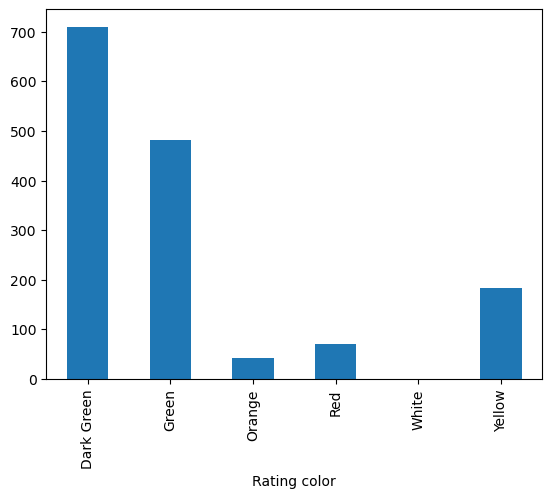

In [29]:
(final.groupby('Rating color').mean()['Votes']).plot(kind="bar")

In [30]:
# Analysing 'Average Cost for two' column

by_rating=df.groupby(['Rating color']).mean().round()
by_rating

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Rating color,,,,,,,,
Dark Green,10050684.0,113.0,26.0,19.0,8137.0,3.0,5.0,852.0
Green,9775255.0,69.0,42.0,23.0,3556.0,3.0,4.0,520.0
Orange,6124779.0,4.0,74.0,28.0,568.0,2.0,3.0,48.0
Red,3148048.0,6.0,76.0,28.0,638.0,2.0,2.0,91.0
White,15573392.0,1.0,66.0,25.0,340.0,1.0,0.0,1.0
Yellow,7594804.0,24.0,60.0,26.0,1045.0,2.0,4.0,229.0


<AxesSubplot:title={'center':'Aggregate rating vs Average Cost for two'}, xlabel='Aggregate rating', ylabel='Average Cost for two'>

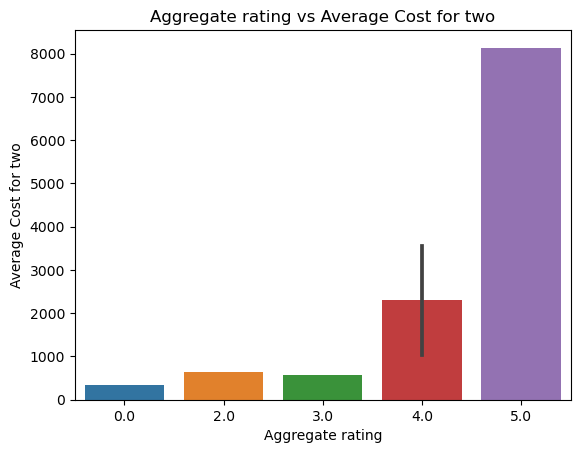

In [31]:
plt.title("Aggregate rating vs Average Cost for two")     #Add title

sns.barplot(x=by_rating['Aggregate rating'],y=by_rating['Average Cost for two'])

Top rated restaurants have high average cost

<AxesSubplot:title={'center':'Rating text vs Average Cost for two'}, xlabel='Rating text', ylabel='Average Cost for two'>

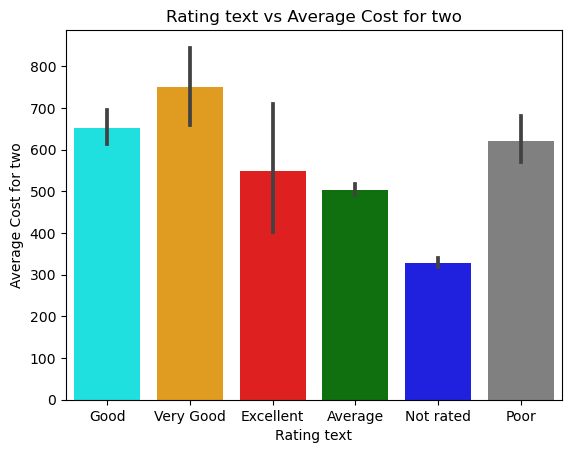

In [32]:
# Analysing 'Rating text' column

plt.title("Rating text vs Average Cost for two")     #Add title
sns.barplot(x=final['Rating text'],y=final['Average Cost for two'],palette=['cyan','orange', 'red', 'green', 'blue','grey'])

## Encoding the categorical columns

In [33]:
categorical_columns

['Country',
 'City',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [34]:
final.drop(['Rating text','Rating color'],axis=1,inplace= True)

In [35]:
final.head()

,Country Code,Country,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,1,India,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,140
1,1,India,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,71
2,1,India,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,94
4,1,India,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,177
6,1,India,Agra,78.044095,27.160934,"North Indian, Mughlai",2500,Indian Rupees(Rs.),No,No,No,No,4,4.3,133


In [37]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
cat_col =['Country',
 'City',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 ]
le = LabelEncoder()
for i in cat_col:
    final[i] = le.fit_transform(final[i])
final.head()


,Country Code,Country,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,1,3,1,78.011544,27.161661,49,850,4,0,0,0,0,3,3.9,140
1,1,3,1,0.000000,0.000000,49,700,4,0,0,0,0,2,3.5,71
2,1,3,1,78.011608,27.160832,40,500,4,0,0,0,0,2,3.6,94
4,1,3,1,78.007553,27.201725,44,1000,4,0,0,0,0,3,4.2,177
6,1,3,1,78.044095,27.160934,49,2500,4,0,0,0,0,4,4.3,133


# Detection of the outliers 

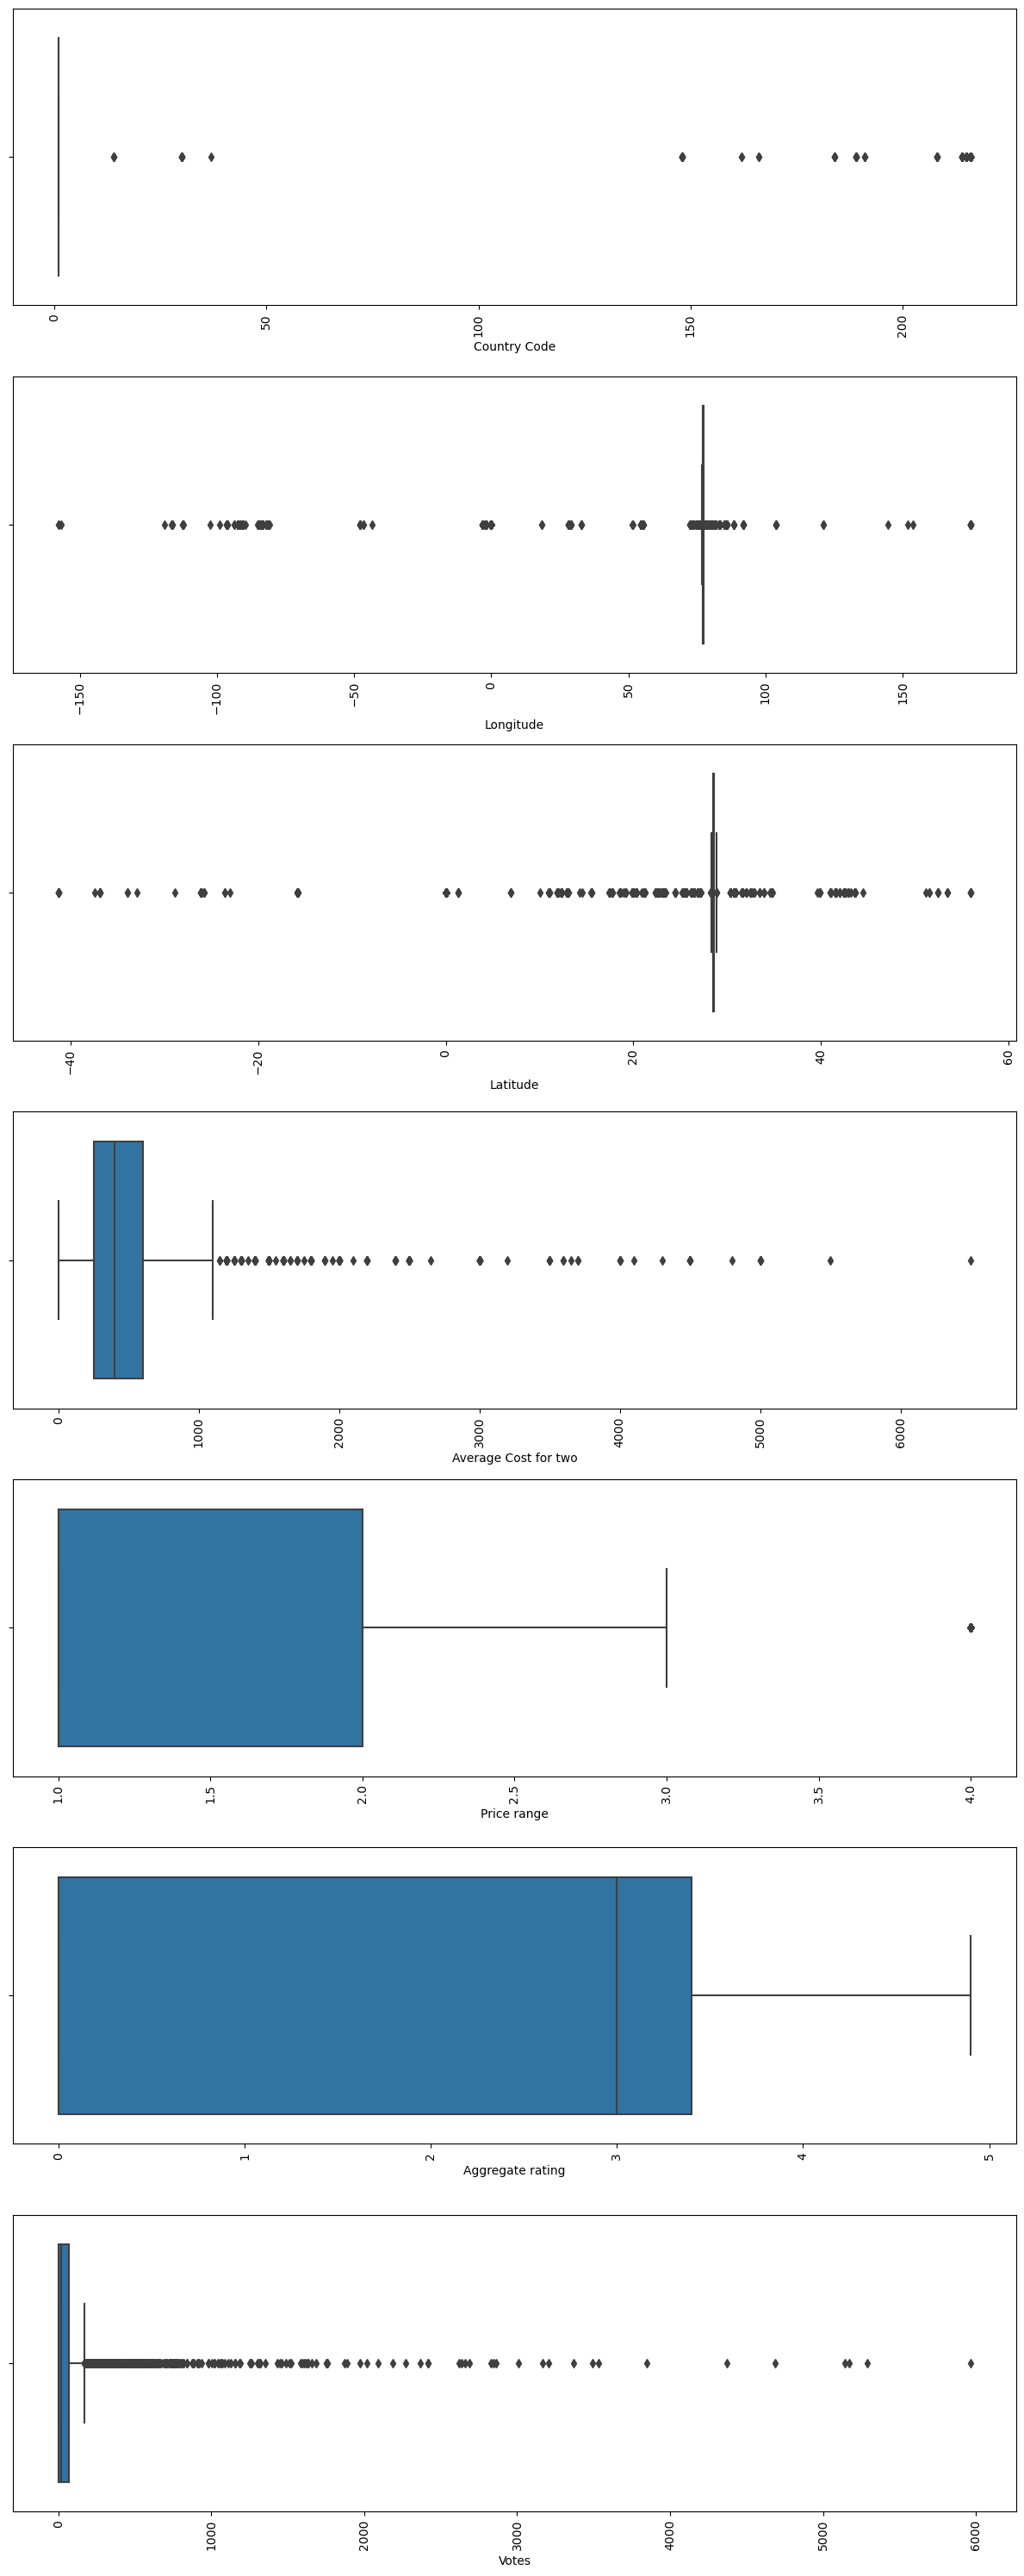

In [38]:
# Create the subplots
fig = plt.figure(figsize=(12, 30))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_columns):
    plt.subplot(7,1 , i + 1)
    sns.boxplot(data=final, x=col,)
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



* too many outliers present in the dataset . we will fix that in the further analysis

### using zscore to handle outliers


In [39]:
def remove_outliers_zscore(df, columns, z_threshold=3):
    for column in columns:       # Calculate Z-score for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())   # Remove rows where Z-score exceeds the threshold 
        df = df.drop(df.index[z_scores > z_threshold])
    
    return df

In [40]:
final  = remove_outliers_zscore(final,final.columns)

## checking the skewness of the data

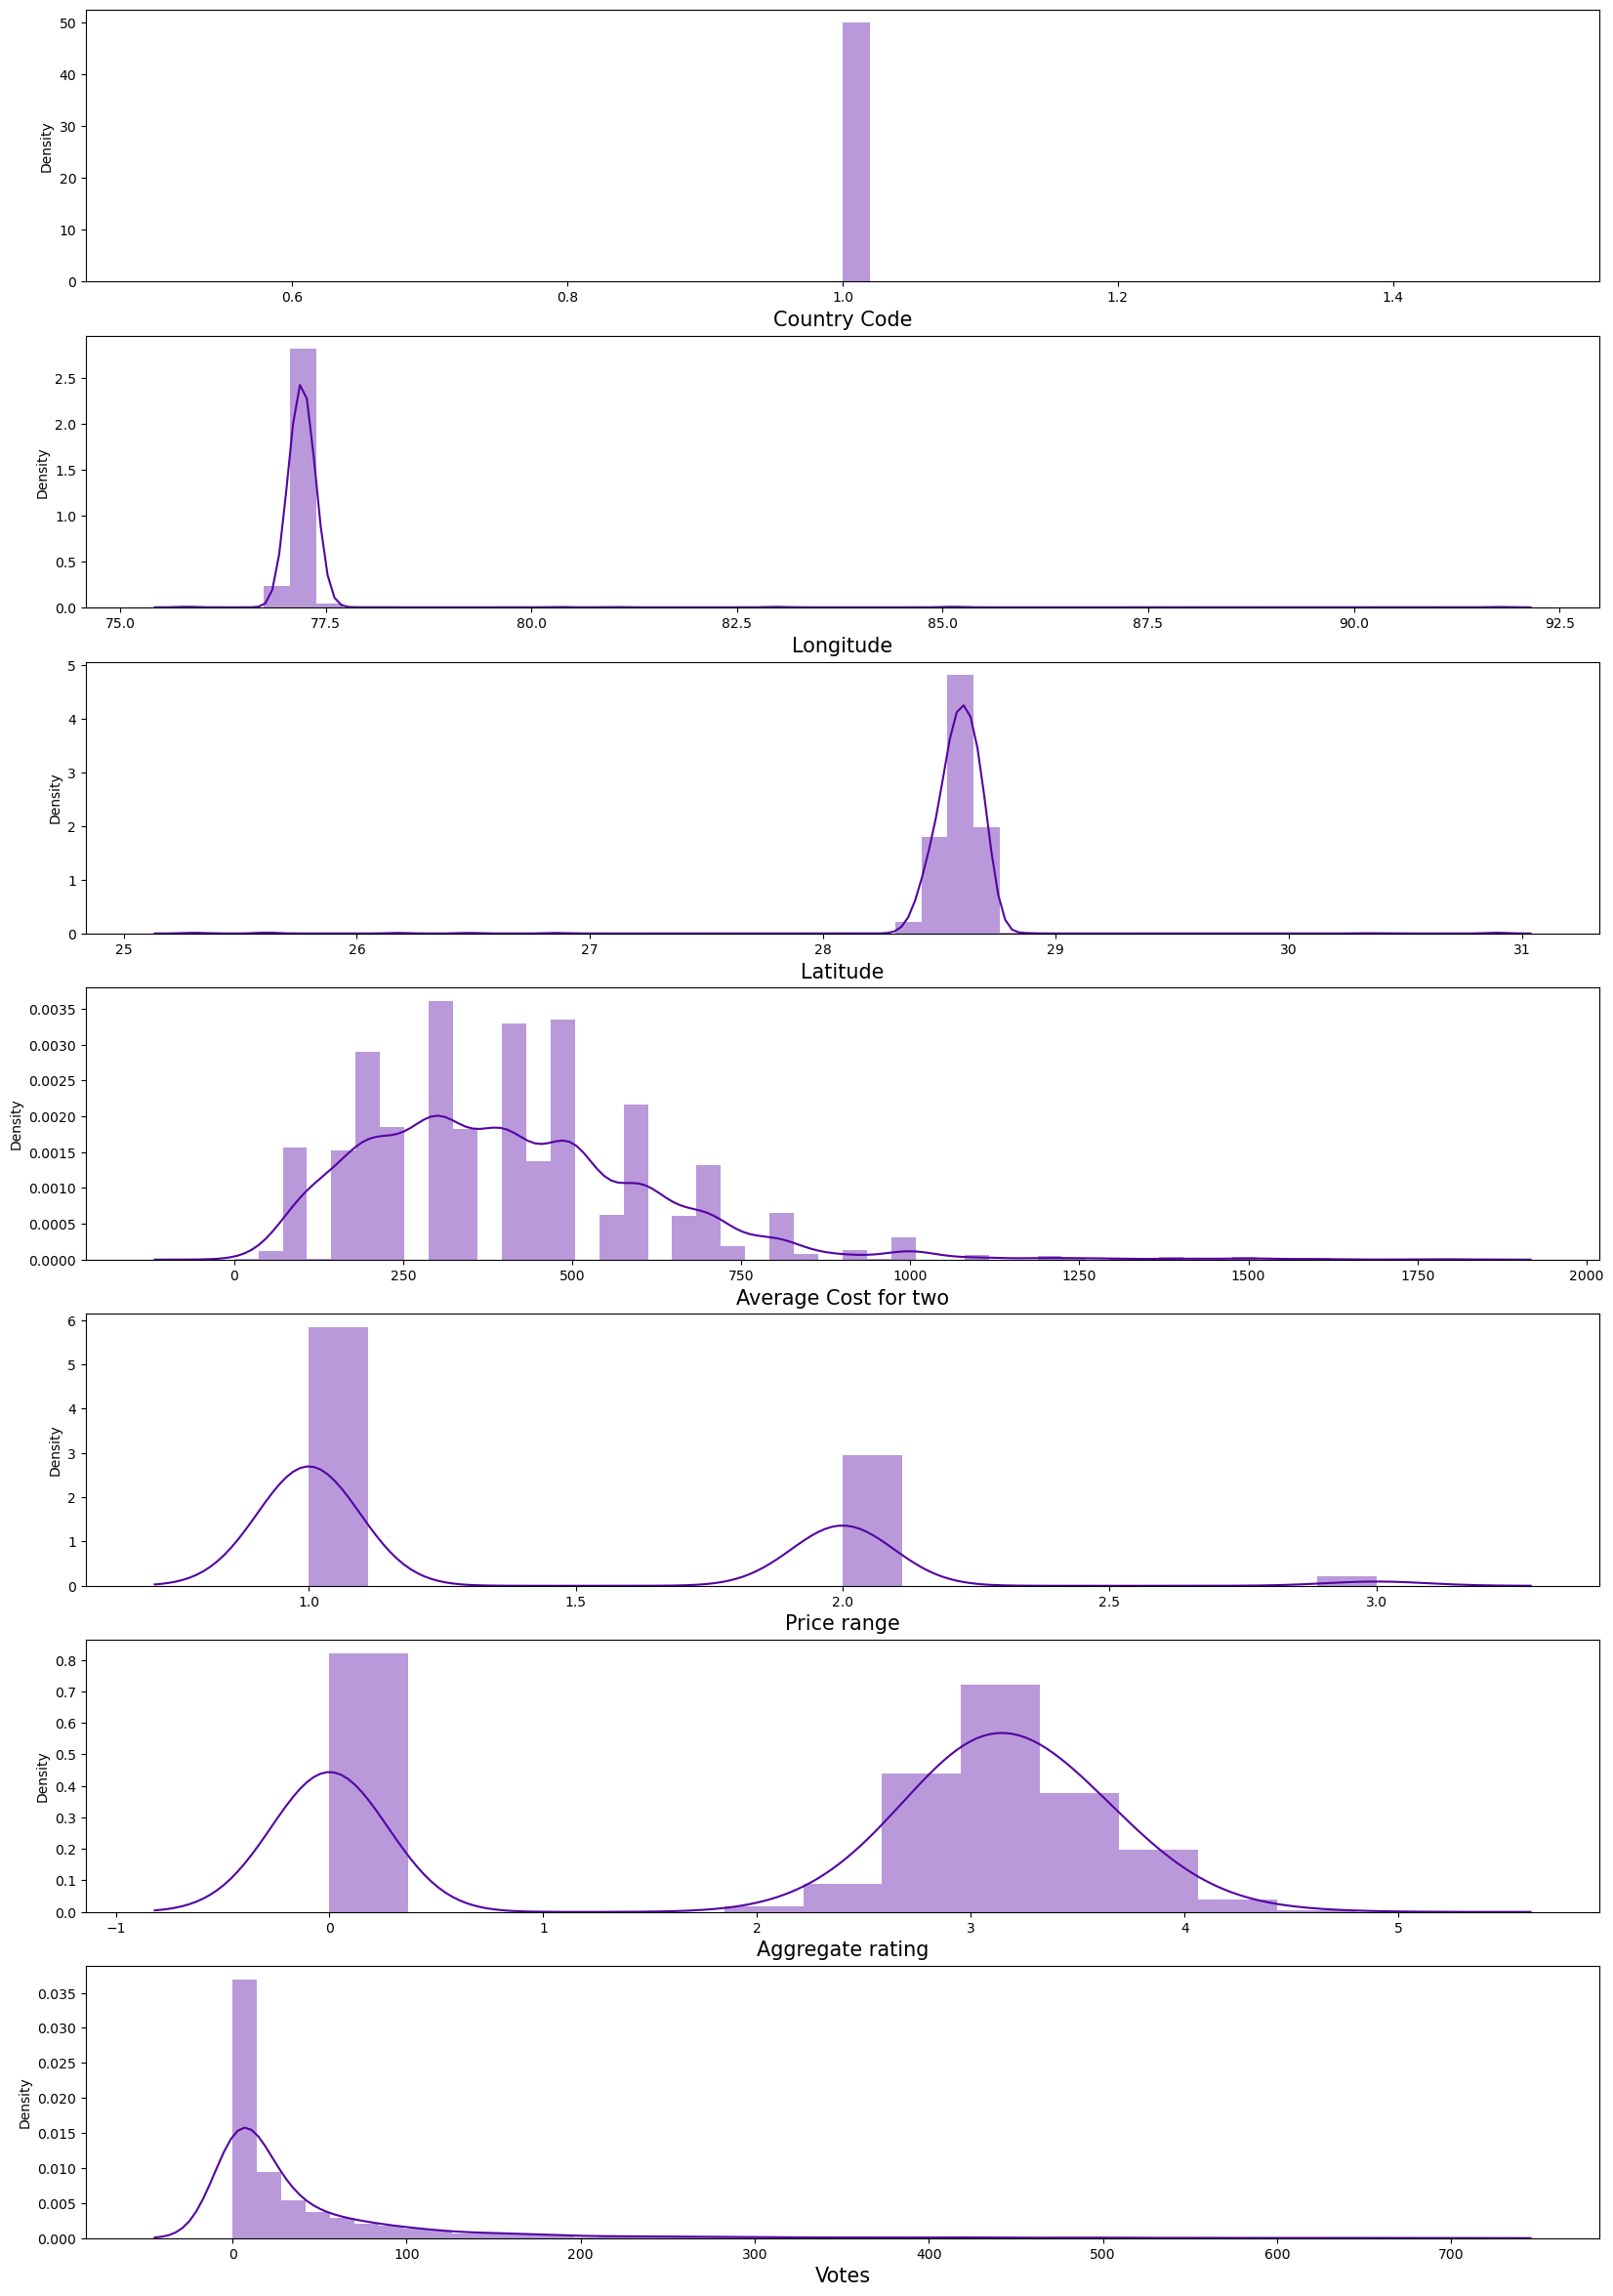

In [41]:
plt.figure(figsize=(20,60),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in numerical_columns:
    if plotnum<14:
        plt.subplot(14,1,plotnum)
        sns.distplot(final[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [42]:
# using log transformation to remove skewness from the votes
final['Votes'] = np.log1p(final['Votes'])

In [43]:
final.skew()

Country Code             0.000000
Country                  0.000000
City                    -1.775023
Longitude               15.991370
Latitude                -6.834598
Cuisines                -0.116317
Average Cost for two     1.224992
Currency                 0.000000
Has Table booking        0.000000
Has Online delivery      1.058567
Is delivering now        0.000000
Switch to order menu     0.000000
Price range              0.983045
Aggregate rating        -0.685152
Votes                    0.025487
dtype: float64

In [44]:
final.isnull().sum()

Country Code            0
Country                 0
City                    0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

# Balanceing Imbalanced target feature

In [66]:
# Splitting data in target and dependent feature
x=final.drop(columns=['Average Cost for two','Price range'],axis=1)
x2=final.drop(columns=['Average Cost for two'],axis=1)

z=final['Average Cost for two']
y= final['Price range']

In [78]:
# Oversampleing using SMOTE Techniques fot categorical target
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

y.value_counts()


3    3296
2    3296
1    3296
Name: Price range, dtype: int64

# scaling the data

In [67]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(x2)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale2 = scaler.fit_transform(x)

### Checking Multicollinearity between features using variance_inflation_factor¶

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(x2.columns))]
vif["Features"] = x2.columns
vif

,VIF values,Features
0,NaN,Country Code
1,NaN,Country
2,1.099639,City
3,2.593283,Longitude
4,2.618368,Latitude
5,1.013861,Cuisines
6,NaN,Currency
7,NaN,Has Table booking
8,1.297800,Has Online delivery
9,NaN,Is delivering now


##### We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.

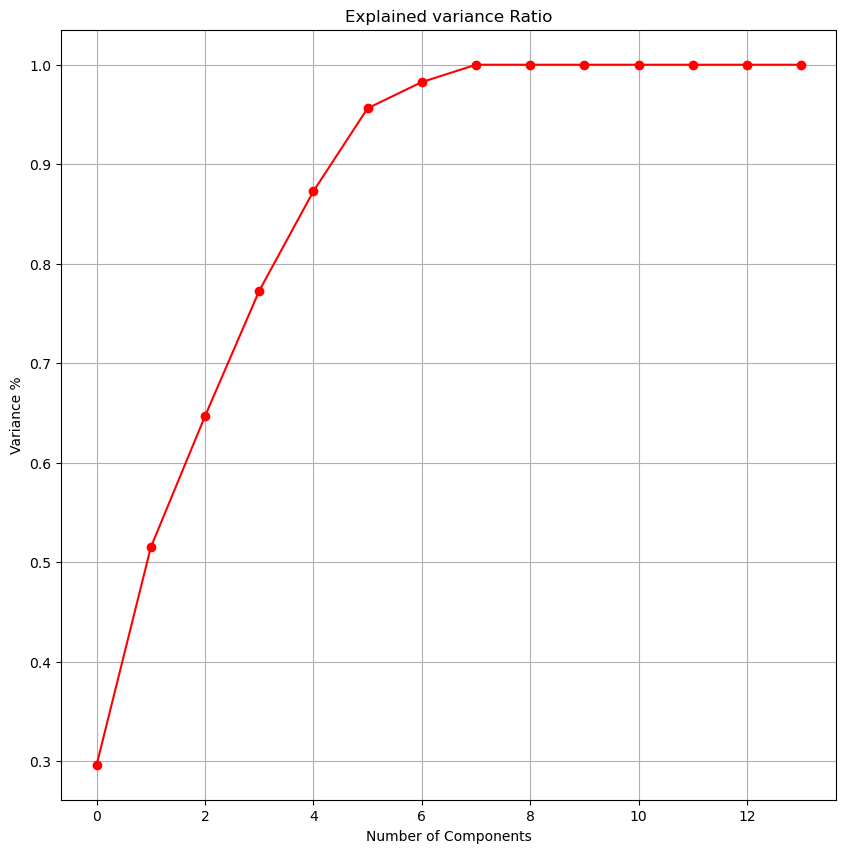

In [69]:
#Using PCA
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

* AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. We shall pick the first 32 components for our prediction.

In [70]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X_scale)

In [71]:
principle_x=pd.DataFrame(x_new,columns=np.arange(8))

### Train test Split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, z, random_state=64, test_size=.3)

## Model Building

## Linear Regression

In [73]:
LR = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(LR, X_train, y_train, cv=5, scoring='r2')

# Fit the model on the entire training set
LR.fit(X_train, y_train)

# Predict on the test set
y_pred = LR.predict(X_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())



R2 Score: 0.7600252699767674
MAE: 87.47030532512991
Cross-Validation Scores: [0.71877541 0.70243868 0.75120286 0.72113045 0.71779943]
Mean Cross-Validation Score: 0.7222693672292111


## Ridge Regression

In [74]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example parameter values, you can modify it

# Create the Ridge regression model
R = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(R, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_R = grid_search.best_estimator_
best_R.fit(X_train, y_train)

# Predict on the test set
y_pred = best_R.predict(X_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_R, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'alpha': 10}
R2 Score: 0.7599952548861523
MAE: 87.43872451179483
Cross-Validation Scores: [0.7187921  0.70277834 0.75110504 0.72138001 0.71748457]
Mean Cross-Validation Score: 0.7223080111546824


## Lasso Regression

In [75]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example parameter values, you can modify it

# Create the Lasso regression model
L = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(L, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_L = grid_search.best_estimator_
best_L.fit(X_train, y_train)

# Predict on the test set
y_pred = best_L.predict(X_test)


# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_L, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'alpha': 1}
R2 Score: 0.7596662733279574
MAE: 87.37706491164914
Cross-Validation Scores: [0.71945093 0.70475092 0.7516064  0.72218804 0.71658193]
Mean Cross-Validation Score: 0.7229156444366425


## Decision Tree Regressor


In [76]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the Decision Tree Regressor model
DTR = DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(DTR, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_DTR = grid_search.best_estimator_
best_DTR.fit(X_train, y_train)

# Predict on the test set
y_pred = best_DTR.predict(X_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_DTR, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
R2 Score: 0.7518563682362852
MAE: 82.62451147909415
Cross-Validation Scores: [0.75136346 0.62643151 0.73304324 0.69254375 0.73847588]
Mean Cross-Validation Score: 0.7083715680502582


## Classification 

In [81]:
# train test split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale2, y, random_state=167, test_size=.3)

## Model building

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc

# Logistic Regession 

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.68      0.63       983
           2       0.52      0.44      0.48       971
           3       0.63      0.61      0.62      1013

    accuracy                           0.58      2967
   macro avg       0.58      0.58      0.57      2967
weighted avg       0.58      0.58      0.57      2967

Cross-Validation Scores: [0.45500506 0.5364004  0.61274014 0.58421851 0.57561963]
Mean Cross-Validation Score: 0.5527967480423249


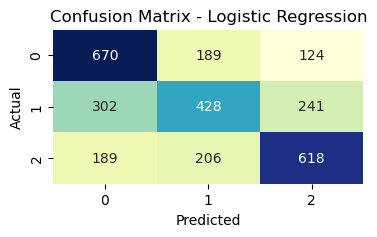

In [83]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train2,y_train2)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test2)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test2, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X_scale2, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test2, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Random forest classifier 

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.80      0.81       983
           2       0.78      0.80      0.79       971
           3       0.95      0.96      0.96      1013

    accuracy                           0.85      2967
   macro avg       0.85      0.85      0.85      2967
weighted avg       0.85      0.85      0.85      2967

Cross-Validation Scores: [0.67391304 0.77654196 0.77957533 0.84522003 0.69853313]
Mean Cross-Validation Score: 0.7547566990051926


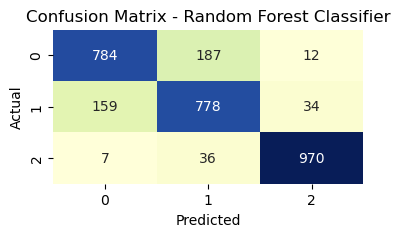

In [84]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()


# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train2, y_train2)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test2)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test2, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, X_scale2, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test2, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Classifier

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.72      0.73       983
           2       0.71      0.74      0.72       971
           3       0.91      0.90      0.91      1013

    accuracy                           0.79      2967
   macro avg       0.79      0.79      0.79      2967
weighted avg       0.79      0.79      0.79      2967

Cross-Validation Scores: [0.64004044 0.7512639  0.75227503 0.80070814 0.67273647]
Mean Cross-Validation Score: 0.7234047972308443


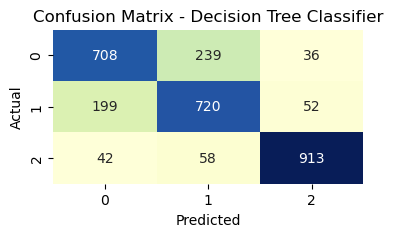

In [85]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train2, y_train2)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test2)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test2, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X_scale2, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test2, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## highest acc in regression model is =  72.29 by lesso regressor
## highest acc in classificaiton model is = 75.4 by random forest classifier

In [86]:
filename = 'lesso.pkl'
pickle.dump(Lasso, open(filename, 'wb'))

In [87]:
filename = 'random.pkl'
pickle.dump(RF, open(filename, 'wb'))

In [88]:
pickle.dump(principle_x, open('pcaselectionreg.pkl','wb'))
pickle.dump(X_scale2, open('scalerclassifier.pkl','wb'))